# Derivative of Matrix

## import library

In [89]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load image 

In [90]:
I = img.imread('asmt3-1.jpg')  

## check the size of image

In [91]:
n_row = I.shape[0]
n_col = I.shape[1]

print(I.shape)

(574, 560, 3)


## convert the input image into gray scale if it is color

In [92]:
if I.shape[2] == 3:
    S = np.array([[0.00000000] * I.shape[1] for _ in range(I.shape[0])])
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            S[i][j] = sum(I[i][j])/3
    I = S


## normalize input image so that the range of image is $[0, 1]$

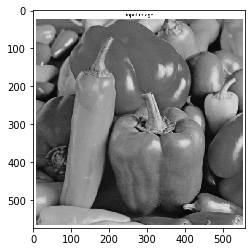

In [93]:
I_mean = np.round(np.mean(I),4)
I_std = np.round(np.std(I),4)

for i in range(len(I)):
    for j in range(len(I[0])):
        I[i][j] = np.round((I[i][j] - I_mean) / I_std, 8)

I_min = np.min(I)


for i in range(len(I)):
    for j in range(len(I[0])):
        I[i][j] = I[i][j] - I_min
I_max = np.max(I)

for i in range(len(I)):
    for j in range(len(I[0])):
        I[i][j] = I[i][j] / I_max

plt.imshow(I, cmap='gray')

```git commit -a -m "load image" ``` \
```git push origin master```

## generate a matrix to compute the derivative in $x$-direction

In [94]:
Dx = [[0] * len(I[0]) for _ in range(len(I[0]))]
for i in range(len(Dx)):
    if i == len(Dx)-1:
        Dx[i][i] = -1
        break
    Dx[i][i] = -1
    Dx[i+1][i] = 1


## compute the derivative of $I$ with respect to $x$-direction

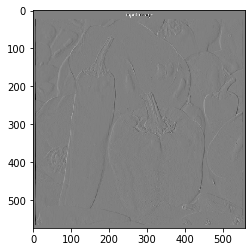

In [95]:
Ix = I.dot(Dx)
plt.imshow(Ix, cmap='gray')


```git commit -a -m "compute the derivative in x-direction"``` \
```git push origin master```

## generate a matrix to compute the derivative in $y$-direction

In [96]:
Dy = np.array([[0] * len(I) for _ in range(len(I))])
for i in range(len(Dy)):
    if i == len(Dy)-1:
        Dy[i][i] = -1
        break
    Dy[i][i] = -1
    Dy[i][i+1] = 1


## compute the derivative of $I$ with respect to $y$-direction

In [97]:
Iy = Dy.dot(I)
print(np.max(Iy), np.min(Iy))

0.9843137265872388 -1.0


```git commit -a -m "compute the derivative in y-direction"``` \
```git push origin master```

## compute $L_2^2$ of the gradient of $I$

In [98]:
norm_gradient = Ix*Ix + Iy*Iy
print(np.max(norm_gradient), np.min(norm_gradient))

2.0 0.0


## define functions for the visualization

In [99]:
def plot_image(I):
    
    plt.figure(figsize=(10,10))
    plt.imshow(I, cmap='gray' )
    plt.title('input image')
    plt.axis('off')
        
def plot_image_derivative_x(Ix):
    for i in range(len(Ix)):
        for j in range(len(Ix[0])):
            if Ix[i][j] <= 0:
                continue
            else:
                Ix[i][j] = np.log2(Ix[i][j])
                
    plt.figure(figsize=(10,10))
    plt.imshow(Ix, cmap='gray' )
    plt.title('image derivative of x')
    plt.axis('off')

    
def plot_image_derivative_y(Iy):
    for i in range(len(Iy)):
        for j in range(len(Iy[0])):
            if Iy[i][j] <= 0:
                continue
            else:
                Iy[i][j] = np.log2( Iy[i][j] )
    plt.figure(figsize=(10,10))
    plt.imshow(Iy, cmap='gray')
    plt.title('image derivative of y')
    plt.axis('off')

    
def plot_norm_gradient(norm_gradient):
    for i in range(len(norm_gradient)):
        for j in range(len(norm_gradient[0])):
            norm_gradient[i][j] = np.log2(0.00000001 + norm_gradient[i][j])
    plt.figure(figsize=(10,10))
    plt.imshow(norm_gradient, cmap='gray' )
    plt.title('norm gradient')
    plt.axis('off')

```git commit -a -m "define functions for the visualization"``` \
```git push origin master```

# ###################################################################

# # results

# ###################################################################

# # 01. plot the input image in gray scale

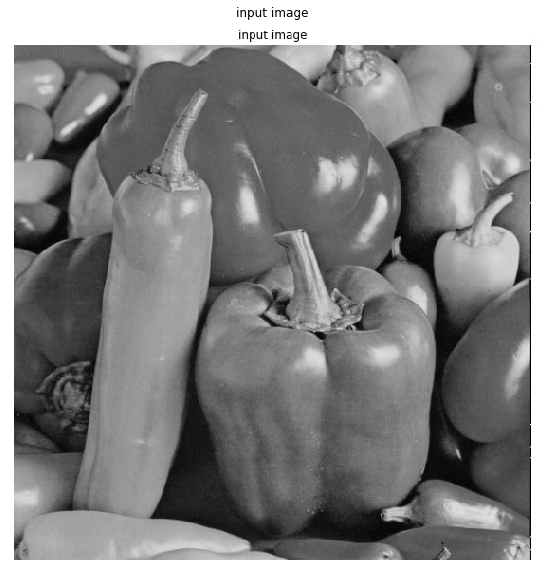

In [100]:
plot_image(I)

# # 02. plot the derivative $I_x$ of input image in x-direction

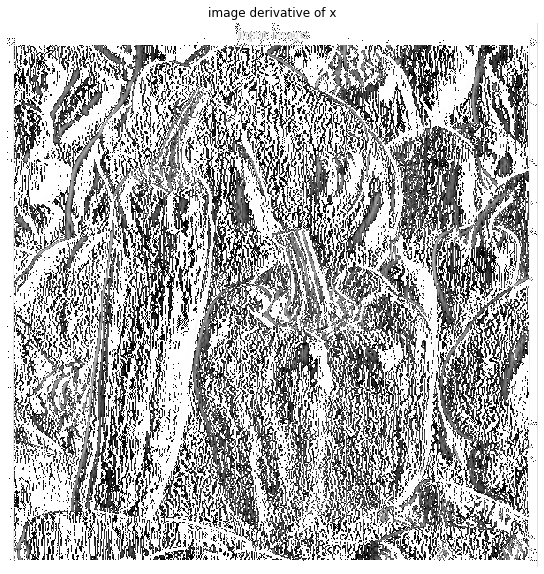

In [101]:
plot_image_derivative_x(Ix)

# # 03. plot the derivative $I_y$ of input image in y-direction

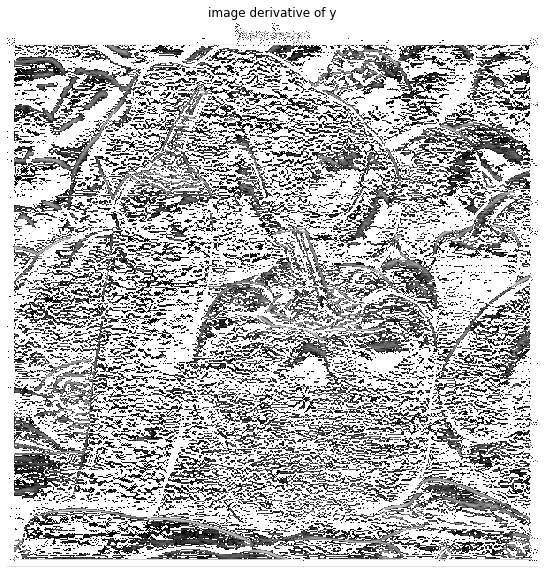

In [102]:
plot_image_derivative_y(Iy)

# # 04. plot $L_2^2$ norm $I_x^2 + I_y^2$ of the gradient of input image

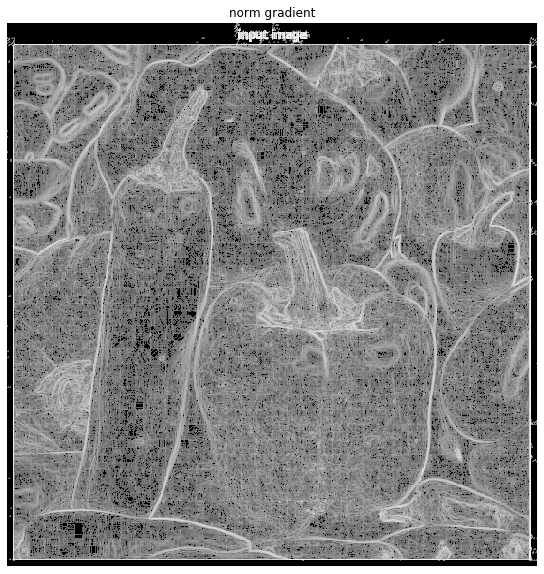

In [103]:
plot_norm_gradient(norm_gradient)